# Sampling


In this first course, we begin with discussing the details around getting data for analysis, and continue with trying to understand the intricacies around how data is structured and measured. We'll then move on with learning techniques to organize and visualize relatively large amounts of data, which will make the process of finding patterns considerably less difficult.

Below is a diagram describing the workflow we'll be focusing on throughout this first course.

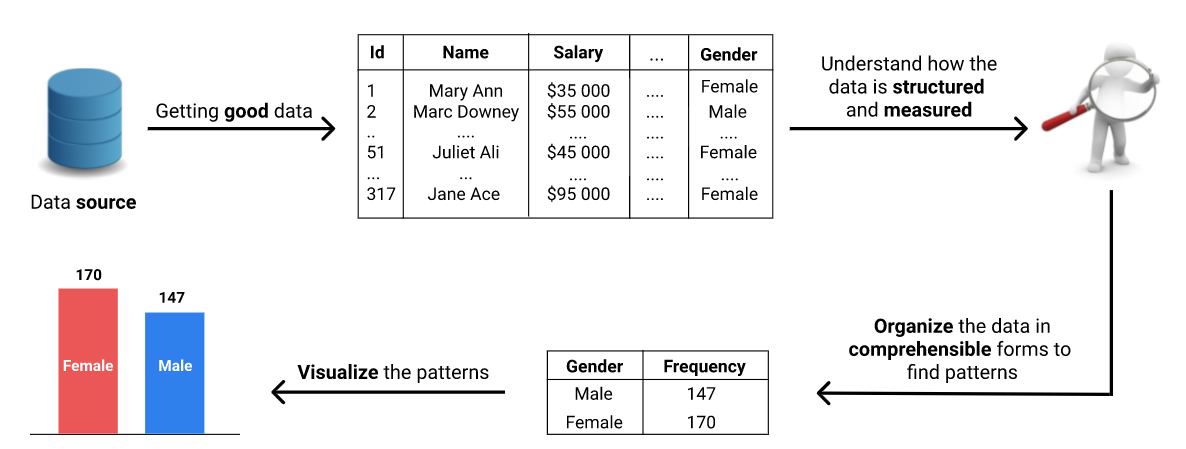

## Populations and samples

In statistics, the set of all individuals relevant to a particular statistical question is called a population. For our analyst's question, all the people inside the company were relevant. So the population in this case consisted from all the people in the company.

A smaller group selected from a population is called a sample. When we select a smaller group from a population we do sampling. In our example, the data analyst took a sample of approximately 100 people from a population of over 50,000 people.

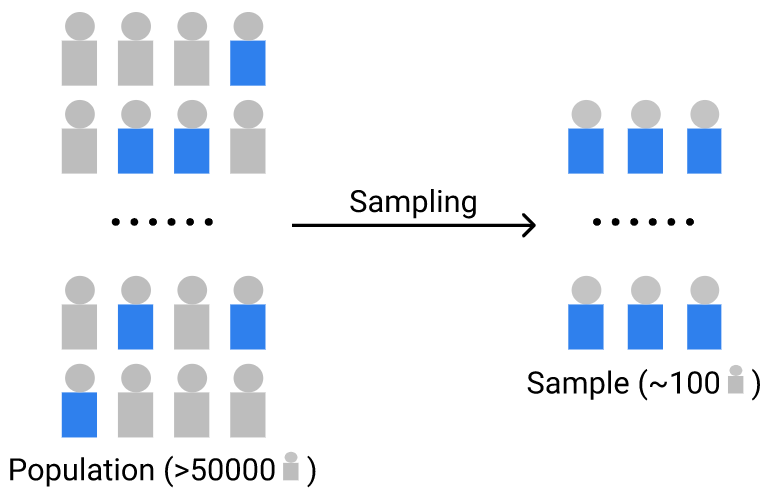

The individual elements of a population or a sample go under many names. You'll often see the elements of a population referred to as individuals, units, events, observations. These are all used interchangeably and refer to the same thing: the individual parts of a population. When we use the term "population individuals", the population is not necessarily composed of people. "Individuals" here is a general term that could refer to people, needles, frogs, stars, etc.

In the case of a sample, you'll often see this terminology used interchangeably: sample unit, sample point, sample individual, or sample observation.

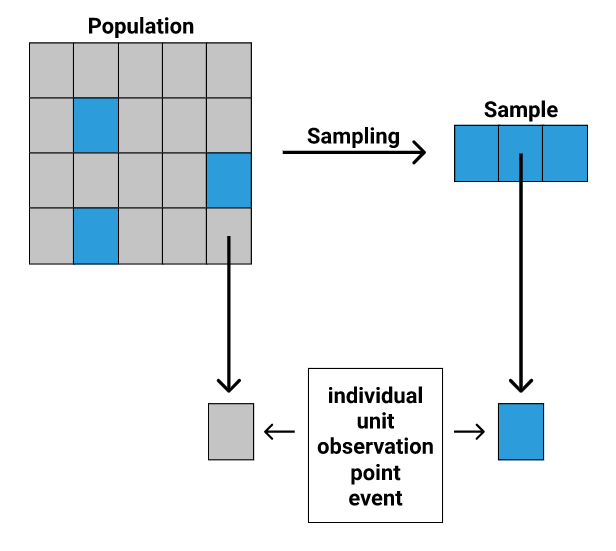

## Sampling error

For every statistical question we want to answer, we should try to use the population. In practice, that's not always possible because the populations of interest usually vary from large to extremely large. Also, getting data is generally not an easy task, so small populations often pose problems too.

These problems can be solved by sampling from the population that interests us. Although not as good as working with the entire population, working with a sample is the next best thing we can do.

When we sample, the data we get might be more or less similar to the data in the population. For instance, let's say we know that the average salary in our company is $34500, and the proportion of women is 60\%. We take two samples and find these results:

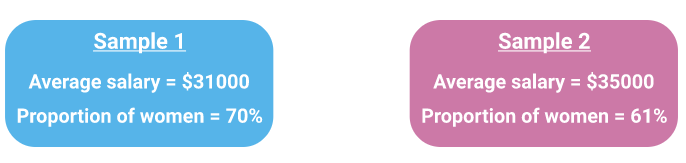

As you can see, the metrics of the two samples are different than the metrics of the population. A sample is by definition an incomplete set of data for the question we're trying to answer. For this reason, there's almost always some difference between the metrics of a population and the metrics of a sample. This difference can be seen as an error, and because it's the result of sampling, it's called **sampling error**.


A metric specific to a population is called a parameter, while one specific to a sample is called a statistic. In our example above, the average salary of all the employees is a parameter because it's a metric that describes the entire population. The average salaries from our two samples are examples of statistics because they only describe the samples.

Another way to think of the concept of the sampling error is as the difference between a parameter and a statistic:


$$sampling error = parameter - statistic$$



### WNBA Salaries

At this point in the mission, we'll move from the tech company example to working with a real world data set. Our first challenge will be to measure sampling error using this data set.

The data set is about basketball players in the WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the season 2016-2017. The data set was put together by Thomas De Jonghe, and can be downloaded from Kaggle, where you can also find useful documentation for the data set.

In [2]:
import pandas as pd

wnba = pd.read_csv('wnba.csv')

wnba.head()

Name Team  Pos  Height  Weight        BMI Birth_Place  \
0    Aerial Powers  DAL    F     183    71.0  21.200991          US   
1      Alana Beard   LA  G/F     185    73.0  21.329438          US   
2     Alex Bentley  CON    G     170    69.0  23.875433          US   
3  Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   

           Birthdate  Age         College  ... OREB  DREB  REB  AST  STL  BLK  \
0   January 17, 1994   23  Michigan State  ...    6    22   28   12    3    6   
1       May 14, 1982   35            Duke  ...   19    82  101   72   63   13   
2   October 27, 1990   26      Penn State  ...    4    36   40   78   22    3   
3  December 11, 1988   28    Georgia Tech  ...   35   134  169   65   20   10   
4     August 5, 1994   23          Baylor  ...    3     9   12   12    7    0   

   TO  PTS  DD2  TD3  
0  12   93    0    0  
1  40  217    0    0  
2  24  218    0    0  
3  38  188    2    0  
4  14   50    0    0  

[5 rows x 32 columns]

In [3]:
wnba.tail()

Name Team  Pos  Height  Weight        BMI Birth_Place  \
138     Tiffany Hayes  ATL    G     178    70.0  22.093170          US   
139   Tiffany Jackson   LA    F     191    84.0  23.025685          US   
140  Tiffany Mitchell  IND    G     175    69.0  22.530612          US   
141      Tina Charles   NY  F/C     193    84.0  22.550941          US   
142     Yvonne Turner  PHO    G     175    59.0  19.265306          US   

              Birthdate  Age         College  ... OREB  DREB  REB  AST  STL  \
138  September 20, 1989   27     Connecticut  ...   28    89  117   69   37   
139      April 26, 1985   32           Texas  ...    5    18   23    3    1   
140  September 23, 1984   32  South Carolina  ...   16    70   86   39   31   
141        May 12, 1988   29     Connecticut  ...   56   212  268   75   21   
142    October 13, 1987   29        Nebraska  ...   11    13   24   30   18   

     BLK  TO  PTS  DD2  TD3  
138    8  50  467    0    0  
139    3   8   28    0    0  
140    5  40  277    0    0  
141   22  71  582   11    0  
142    1  32  151    0    0  

[5 rows x 32 columns]

In [4]:
wnba.shape

(143, 32)

#### Some statistics and sampling errors

Use the Games Played column to find the maximum number of games played by a player in the season 2016-2017. The data set contains all the players that had at least one game, so it's a population relative to our question. Find this parameter, and assign the result to a variable named parameter.

In [8]:
# Takes all the population
parameter = wnba['Games Played'].max()
parameter

32

Using the `DataFrame.sample()` method, sample randomly 30 players from the population, and assign the result to a variable named sample.

In [7]:
sample = wnba['Games Played'].sample(30, random_state = 1)

# Maximum number of games using the sample
statistic = sample.max()
statistic

30

In [9]:
# Sampling error
sampling_error = parameter - statistic
sampling_error

2

## Simple random sampling

When we sample we want to minimize the sampling error as much as possible. We want our sample to mirror the population as closely as possible.

If we sampled to measure the mean height of adults in the US, we'd like our sample statistic (sample mean height) to get as close as possible to the population's parameter (population mean height). For this to happen, **we need the individuals in our sample to form a group that is similar in structure with the group forming the population.**

In statistical terms, we want our samples to be **representative** of their corresponding populations. If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error. The less representative a sample is, the greater the sampling error.

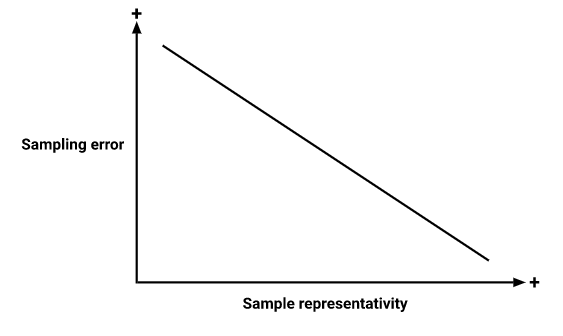


To make our samples representative, we can try to give every individual in the population an equal chance to be selected in our samples. We want a very tall individual to have the same chance as being selected as an individual having a medium or short height. **To give every individual an equal chance of being picked, we need to sample randomly.**


One way to perform random sampling is to generate random numbers and use them to select a few sample units from the population. In statistics, this sampling method is called **simple random sampling**, and it's often abbreviated as **SRS**.

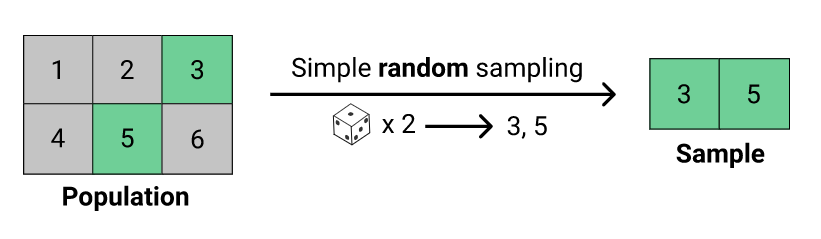

In our previous exercise, we used `Series.sample()` to sample. This method performs simple random sampling by generating an array of random numbers, and then using those numbers to select values from a Series at the indices corresponding to those random numbers. The method can be also extended for DataFrame objects, where random rows or columns can be sampled.

When we use the `random_state` parameter, like we did in the previous exercise with `Series.sample(30, random_state = 1)`, we make the generation of random numbers predictable. This is because `Series.sample()` uses a pseudorandom number generator under the hood. A pseudorandom number generator uses an initial value to generate a sequence of numbers that has properties similar to those of a sequence that is truly random. With random_state we specify that initial value used by the pseudorandom number generator

If we want to generate a sequence of five numbers using a pseudorandom generator, and begin from an initial value of 1, we'll get the same five numbers no matter how many times we run the code. If we ran `wnba['Games Played'].sample(5, random_state = 1)` we'd get the same sample every time we run the code.

**Let's visualize the discrepancy between a parameter and its corresponding statistics in the case of simple random sampling.**

*Using simple random sampling, take 100 samples of 10 values each from our WNBA data set, and for each sample measure the average points scored by a player during the 2016-2017 season.*

In [10]:
import matplotlib.pyplot as plt

wnba = pd.read_csv('wnba.csv')

sample_means = []
for s in range(100):
    sample = wnba['PTS'].sample(10, random_state = s)
    sample_means.append(sample.mean())

Matplotlib is building the font cache; this may take a moment.


*Display the discrepancy between the parameter of interest (the mean of the PTS column) and the statistics obtained in the previous step.*

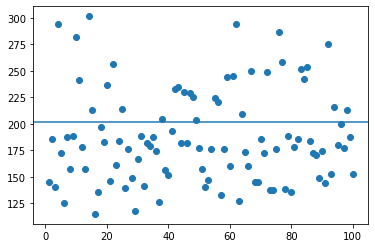

In [12]:
plt.scatter([x for x in range(1,101)], sample_means)

plt.axhline(wnba['PTS'].mean())

From the last scatter plot, we can notice that the sample means vary a lot around the population mean. With a minimum sample mean of 115 points, a maximum of 301.4, and a population mean of roughly 201.8, we can tell that the sampling error is quite large for some of the cases.

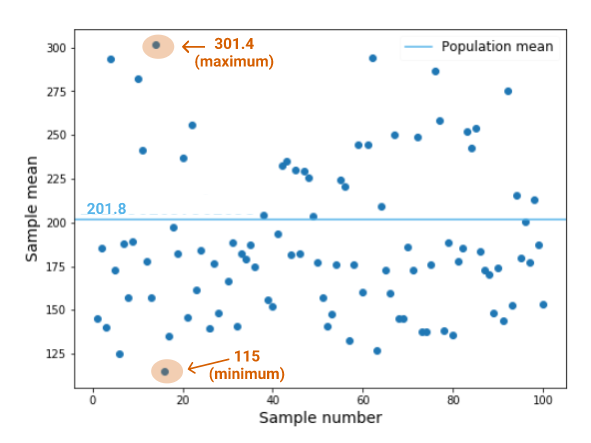

Because sample means vary a lot around the population mean, there's a good chance we get a sample that is not representative of the population:

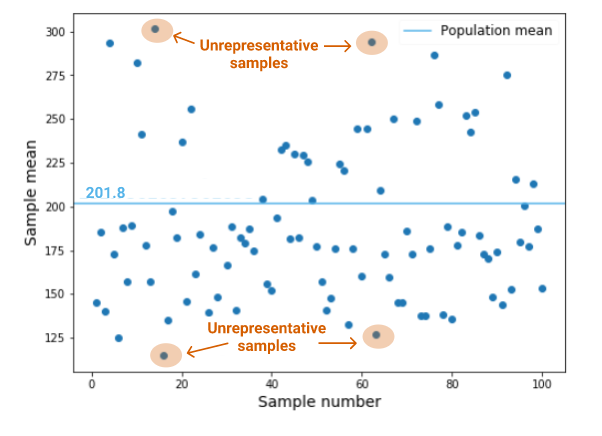

This problem can be solved by **increasing the sample size**. 

### The importance of sample size

As we increase the sample size, the sample means vary less around the population mean, and the chances of getting an unrepresentative sample decrease.

In our last exercise we took 100 samples, and each had a sample size of 10 units. This is what happens when we repeat the procedure, but increase the size of the samples:

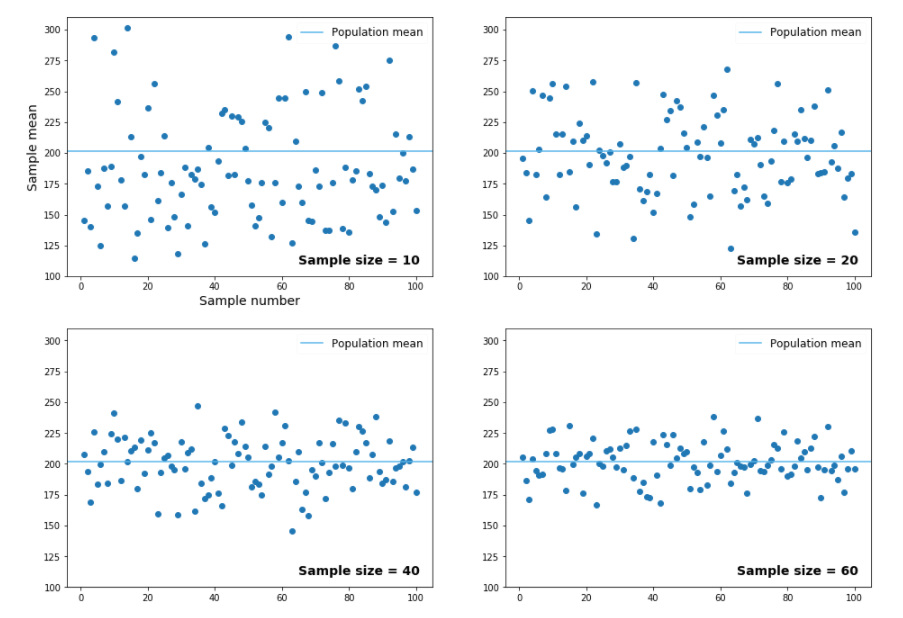

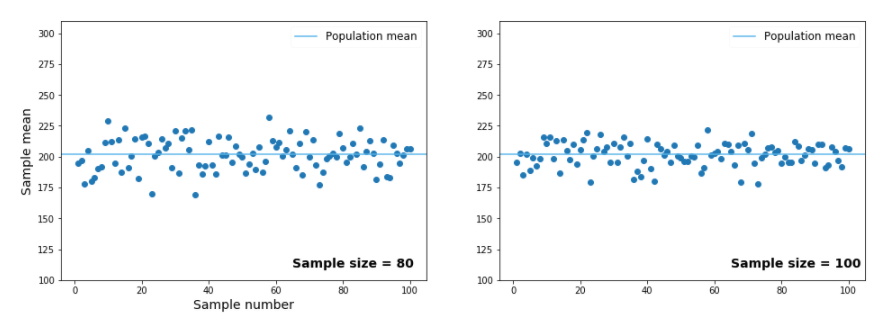

We can easily see how sample means tend to vary less and less around the population mean as we increase the sample size. From this observation we can make two conclusions:

- Simple random sampling is not a reliable sampling method when the sample size is small. Because sample means vary a lot around the population mean, there's a good chance we'll get an unrepresentative sample.
- When we do simple random sampling, we should try to get a sample that is as large as possible. A large sample decreases the variability of the sampling process, which in turn decreases the chances that we'll get an unrepresentative sample.

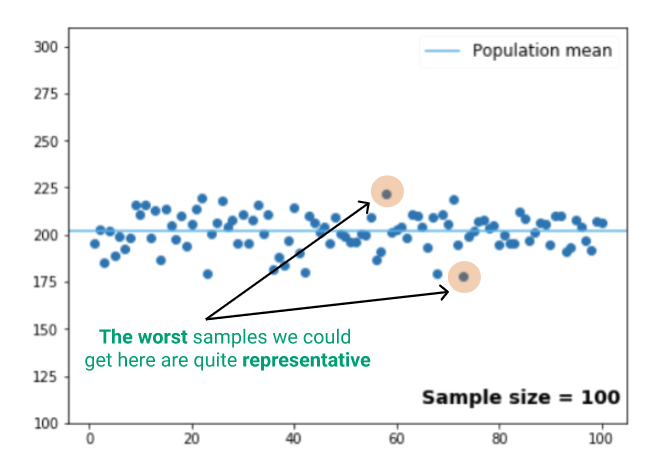

## Stratified sampling

Because simple random sampling is entirely random, it can leave out certain population individuals that are of great interest to some of the questions we may have.

For example, players in basketball play in different positions on the court. The metrics of a player (number of points, number of assists, etc.) depend on their position, and we might want to analyze the patterns for each individual position. If we perform simple random sampling, there's a chance that some categories won't be included in our sample. In other words, it's not guaranteed that we'll have a representative sample that has observations for every position we want to analyze.

There are five unique positions in our data set:

In [13]:
print(wnba['Pos'].unique())

['F' 'G/F' 'G' 'C' 'F/C']


Let's decipher quickly each abbreviation:

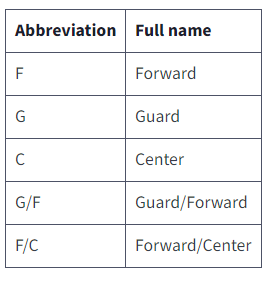

The downside of simple random sampling is that it can leave out individuals playing in a certain position on the field. Visually, and on a smaller scale, this is what could happen:

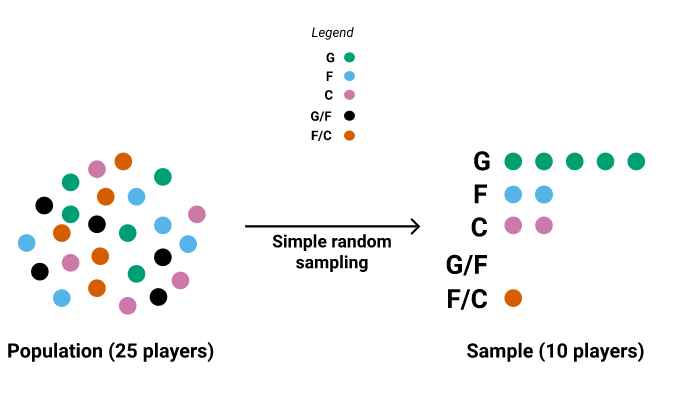

To ensure we end up with a sample that has observations for all the categories of interest, we can change the sampling method. We can organize our data set into different groups, and then do simple random sampling for every group. We can **group our data set by player position, and then sample randomly from each group**.

Visually, and on a smaller scale, we need to do this:

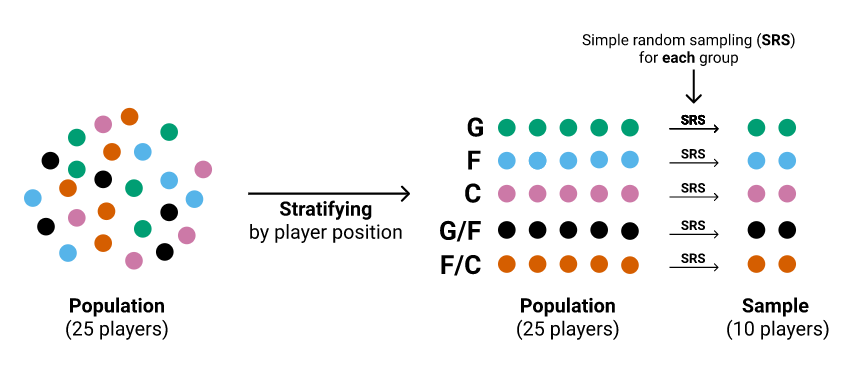

This sampling method is called **stratified sampling**, and each stratified group is also known as a **stratum**.

*Perform stratified sampling: stratify the data set by player position, and then do simple random sampling on every stratum. At the end, use the sample to find which position has the greatest number of points per game.*

In [14]:
# Adding new column: points per game

wnba['points_per_game'] = wnba['PTS'] / wnba['Games Played']

In [15]:
# Dataframes for each position
forward = wnba[wnba['Pos'] == 'F']
guard = wnba[wnba['Pos'] == 'G']
center = wnba[wnba['Pos'] == 'C']
guard_forward = wnba[wnba['Pos'] == 'G/F']
forward_center = wnba[wnba['Pos'] == 'F/C']

In [16]:
# SRS for each position and calculating the mean for each sample
dicc = {}
for strata in [forward, guard, center, guard_forward, forward_center]:
    sample = strata.sample(10, random_state = 0)
    mean_points = sample['points_per_game'].mean()
    dicc[sample['Pos'].iloc[0]] = mean_points

In [18]:
# Finds the max 
position_most_points = max(dicc, key = dicc.get)
position_most_points

'C'

## Proportional stratified sampling

Earlier in this mission we performed simple random sampling 100 times on the original data set, and for each sample we computed the mean number of total points a player scores in a season. The problem is that the number of total points is influenced by the number of games played, which ranges from 2 to 32:

In [19]:
print(wnba['Games Played'].min())
print(wnba['Games Played'].max())

2
32


Approximately 72.7% of the players had more than 23 games for the 2016-2017 season, which means that the mean of the total points is probably influenced by this category of players who played a lot of games. Let's take a look at the other percentages too:

In [28]:
# Organize into bins and normalize as a percentage
wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

*As a side note on the output above, (1.969, 12.0], (12.0, 22.0] and (22.0, 32.0] are number intervals. The ( character indicates that the beginning of the interval is not included, and the ] indicates that the endpoint is included. For example, (22.0, 32.0] means that 22.0 isn't included, while 32.0 is, and the interval contains this array of numbers: [23, 24, 25, 26, 27, 28, 29, 30, 31, 32].*

Getting back to our discussion, when we compute the mean of the total points using the population (the entire data set), the mean will probably be signficantly influenced by those 72.7% players who played more than 23 games. However, when we sample randomly, we can end up with a sample where the proportions are different than in the population.

For instance, we might end up with a sample where only 2% of the players played more than 23 games. This will result in **a sample mean which underestimates the population mean**. Or we could have a sample where more than 95% of the players had 23 games in the 2016-2017 season. This will result in **overestimating the population mean**. This scenario of under or over estimation is common for small samples.

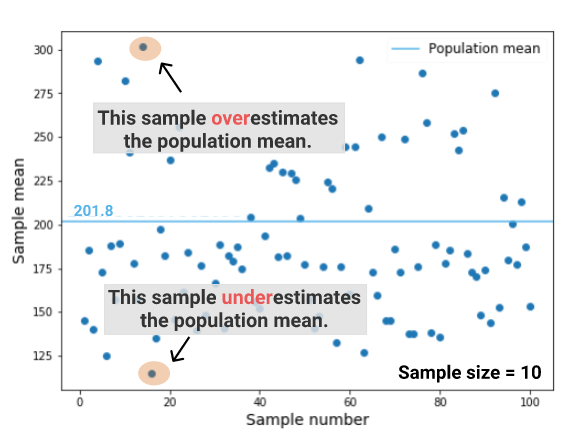

One solution to this problem is to **use stratified sampling while being mindful of the proportions in the population**. **We can stratify our data set by the number of games played, and then sample randomly from each stratum a proportional number of observations.**

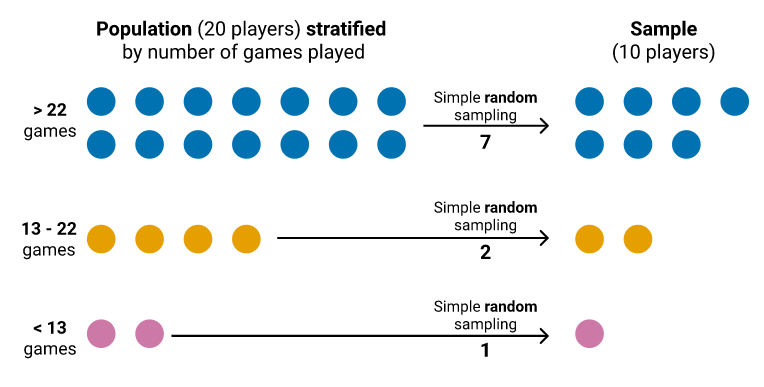

In the diagram above, we can see that from a population of 20 individuals:

- 14 individuals played more than 22 games.
- 4 individuals played between 13 and 22 games.
- 2 individuals played below 13 games.

Transforming these figures to percentages: 
- 70% of the individuals played more than 22 games, 
- 20% played between 13 and 22 games, 
- and 10% played below 13 games. 

Because we sampled proportionally, the same percentages (70%, 20%, 10%) are preserved in the sample (even though the absolute values are different): 70% played more than 22 games, 20% played between 13 and 22 games, and 10% played below 13 games.

*Perform stratified sampling on the data set 100 times, and sample strata proportionally.*

*Stratify the data set by the number of games played in the following way: the first strata should be composed of players that played 12 games or less; the second of players that played more than 12 games, but up to 22 (included); and the third of players that played more than 22 games (22 not included).* 

In [29]:
strat_1 = wnba[wnba['Games Played'] <= 12]
strat_2 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
strat_3 = wnba[(wnba['Games Played'] > 22)]

*Perform stratified sampling 100 times.*

In [30]:
mean_of_samples = []

for s in range(100):
    strat_1_sample = strat_1['PTS'].sample(1, random_state = s)
    strat_2_sample = strat_2['PTS'].sample(2, random_state = s)
    strat_3_sample = strat_3['PTS'].sample(7, random_state = s)
    full_sample = pd.concat([strat_1_sample, strat_2_sample, strat_3_sample])
    mean_of_samples.append(full_sample.mean())

*Display the entire sampling process.*

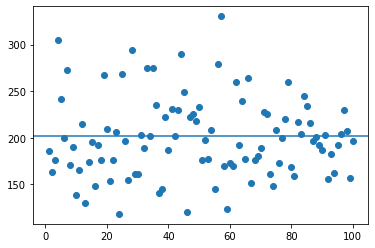

In [31]:
plt.scatter([x for x in range(1, 101)], mean_of_samples)
plt.axhline(wnba['PTS'].mean())

The variability of the sampling was quite large, and many sample means were unrepresentative, being far from the population mean. In fact, this sampling method doesn't seem to perform better than simple random sampling:

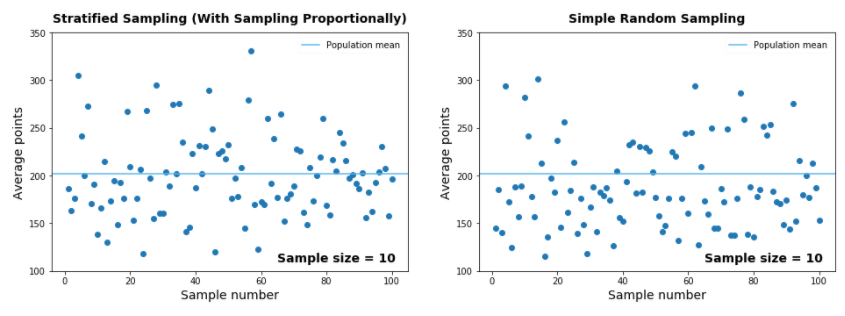


The poor performance is caused by a bad choice of strata. We stratified the data by the number of games played, but this isn't a good approach. A player is considered as having played one game even if she only played for one or two minutes. But others play 30 or 40 minutes, and they're still considered as having played one game.

**It makes more sense to stratify the data by number of minutes played, rather than by number of games played**. The minutes played are a much better indicator of how much a player scored in a season than the number of games played.

Our data set contains the total amount of minutes a player had for the entire season. If we make strata based on minutes played, and then sample proportionally using stratified sampling, we get something visibly better than simple random sampling (especially in terms of variability):

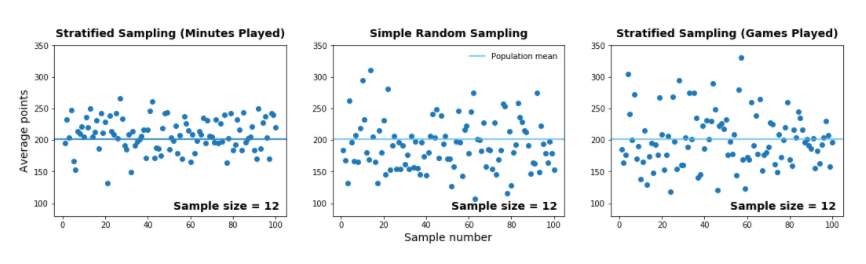

We increased the sample size to 12 so that we can do a better proportional sampling for the strata organized by minutes played.


**Here are a few guidelines for choosing good strata:**

**1. Minimize the variability within each stratum.**

For instance, avoid having in the same stratum a player that has scored 10 points and a player that has scored 500. If the variability is high, it might be a sign that you either need a more granular stratification (need more strata), or you need to change the criterion of stratification (an example of criterion is minutes played).

**2. Maximize the variability between strata.**

Good strata are different from one another. If you have strata that are similar to one another with respect to what you want to measure, you might need a more granular stratification, or to change the stratification criterion. In the previous screen, stratifying the data by games played resulted in strata that weren't too different from each other with respect to the distribution of the total points. We managed to increase the variability between strata by changing the criterion of stratification to minutes played.

**3. The stratification criterion should be strongly correlated with the property you're trying to measure.**

For instance, the column describing minutes played (the criterion) should be strongly correlated with the number of total points (property we want to measure). We've covered briefly the concept of correlation in the pandas courses, and we'll cover it again later in these statistics courses, so don't worry if the concept of correlation doesn't make much sense to you now.

We've left the code editor open for you to try to experiment with the different sampling methods we've learned so far. One thing you can try is to replicate the last graph above. You can then play with sample sizes, and try to get insights into how variability and sampling error change.

In [32]:
wnba['MIN'].value_counts(bins = 3, normalize = True)

(347.333, 682.667]    0.349650
(10.993, 347.333]     0.335664
(682.667, 1018.0]     0.314685
Name: MIN, dtype: float64

In [42]:
strat_1 = wnba[wnba['MIN'] <= 347.333]
strat_2 = wnba[(wnba['MIN'] > 347.333) & (wnba['MIN'] <= 682.667)]
strat_3 = wnba[(wnba['MIN'] > 682.667)]

In [44]:
mean_of_samples = []

for s in range(1,101):
    strat_1_sample = strat_1['PTS'].sample(4, random_state = s)
    strat_2_sample = strat_2['PTS'].sample(3, random_state = s)
    strat_3_sample = strat_3['PTS'].sample(3, random_state = s)
    full_sample = pd.concat([strat_1_sample, strat_2_sample, strat_3_sample])
    mean_of_samples.append(full_sample.mean())

(100.0, 350.0)

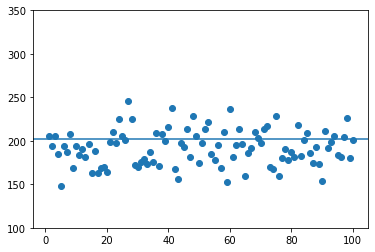

In [46]:
plt.scatter([x for x in range(1, 101)], mean_of_samples)
plt.axhline(wnba['PTS'].mean())
plt.ylim([100, 350])

## Cluster sampling

The data set we've been working with was scraped from the WNBA's website. The website centralizes data on basketball games and players in the WNBA. Let's suppose for a moment that such a site didn't exist, and the data were instead scattered across each individual team's website. There are twelve unique teams in our data set, which means we'd have to scrape twelve different websites, each requiring its own scraping script.

This scenario is quite common in the data science workflow: you want to answer some questions about a population, but the data is scattered in such a way that data collection is either time-consuming or close to impossible. For instance, let's say you want to analyze how people review and rate movies as a function of movie budget. There are a lot of websites out there that can help with data collection, but how can you go about it so that you can spend one day or two on getting the data you need, rather than one month or two?

One way is to list all the data sources you can find, and then randomly pick only a few of them to collect data from. Then you can sample individually each of the sources you've randomly picked. This sampling method is called cluster sampling, and each of the individual data sources is called a cluster.

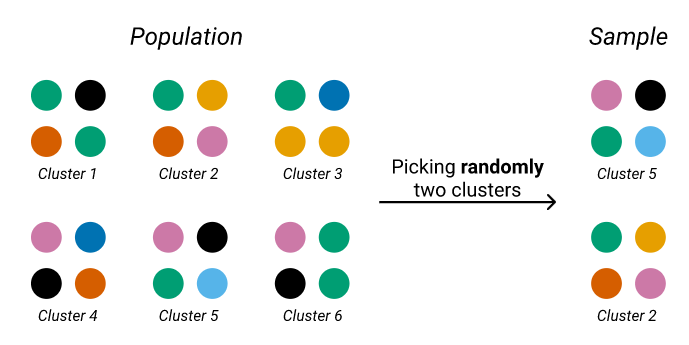

In our case, we'd first list all the possible data sources. Assuming that all the teams in our data set have a website where we can take data from, we end up with this list of clusters (each team's website is considered a cluster) :

In [48]:
print(wnba['Team'].unique())

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']


Then we need to find a way to pick randomly a few clusters from our listing. There are many ways to do that, but the important thing to keep in mind is that we should avoid picking a cluster twice. Here's one way to sample four clusters randomly:

In [50]:
print(pd.Series(wnba['Team'].unique()).sample(4, random_state = 0))

6     PHO
11    IND
4     MIN
10    ATL
dtype: object


Once we pick the clusters, we move to collecting the data. We can collect all the data from each cluster, but we can also perform sampling on each. It's actually possible to use different sampling methods for different clusters. For instance, we can use stratified sampling on the first two clusters, and simple random sampling on the other two.

Let's simulate a cluster sampling on our data set.

*Pick four team clusters randomly using the technique we've learned (use random_state = 0).*

In [52]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)
clusters
#print(clusters.values)

6     PHO
11    IND
4     MIN
10    ATL
dtype: object

*Collect the data from each cluster without sampling the clusters. Create a new DataFrame object that stores the data collected from all clusters.*

In [54]:
cluster_data = wnba[wnba['Team'].isin(clusters.values)]
cluster_data.head()

Name Team  Pos  Height  Weight        BMI Birth_Place  \
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   
6    Alexis Prince  PHO    G     188    81.0  22.917610          US   
14    Aneika Henry  ATL  F/C     193    87.0  23.356332          JM   
15  Angel Robinson  PHO  F/C     198    88.0  22.446689          US   
21     Bria Holmes  ATL    G     185    77.0  22.498174          US   

            Birthdate  Age        College  ... DREB  REB  AST  STL  BLK  TO  \
4      August 5, 1994   23         Baylor  ...    9   12   12    7    0  14   
6    February 5, 1994   23         Baylor  ...   14   15    5    4    3   3   
14  February 13, 1986   31        Florida  ...    4    4    1    2    0   3   
15    August 30, 1995   21  Arizona State  ...   42   58    8    1   11  16   
21     April 19, 1994   23  West Virginia  ...   56   85   52   23    7  31   

    PTS  DD2  TD3  points_per_game  
4    50    0    0         2.083333  
6    24    0    0         1.500000  
14    8    0    0         2.000000  
15   58    0    0         3.866667  
21  235    0    0         8.392857  

[5 rows x 33 columns]

- *Use the data collected to estimate the mean for the following player attributes:*
    - Height;
    - Age;
    - BMI;
    - Total points.

In [55]:
Height = cluster_data['Height'].mean()
Age = cluster_data['Age'].mean()
BMI = cluster_data['BMI'].mean()
Total_points = cluster_data['PTS'].mean()

- *Finally, measure the sampling error of your estimates.*

In [57]:
sampling_error_height = wnba['Height'].mean() - Height
sampling_error_age = wnba['Age'].mean() - Age
sampling_error_BMI = wnba['BMI'].mean() - BMI
sampling_error_points = wnba['PTS'].mean() - Total_points

print(sampling_error_height, sampling_error_age, sampling_error_BMI, sampling_error_points)

-0.06400121617511445 -1.401337792642142 0.23095444165950596 -27.79674673152934


## Sampling in data science practice

So far, we've explored a few scenarios where sampling can be useful. There are more situations, however, where a data scientist can use sampling, and we discuss a few in this section.

Let's say you work for an e-commerce company that has a table in a database with more than 10 million rows of online transactions. The marketing team asks you to analyze the data and find categories of customers with a low buying rate, so that they can target their marketing campaigns at the right people. Instead of working with more than 10 million rows at each step of your analysis, you can save a lot of code running time by sampling several hundred rows, and perform your analysis on the sample. You can do a simple random sampling, but if you're interested in some categories beforehand, it might be a good idea to use stratified sampling.

Let's consider a different situation. It could be that you need to collect data from an API that either has a usage limit, or is not free. In this case, you are more or less forced to sample. Knowing how and what to sample can be of great use.

Another common use case of sampling is when the data is scattered across different locations (different websites, different databases, different companies, etc.). As we've discussed in the previous screen, cluster sampling would be a great choice in such a scenario.

Sampling is a vast topic in statistics, and there are other sampling methods besides what we've discussed so far in our course. Here's a good starting point to read about other potentially useful sampling methods.

## Descriptive and Inferential statistics

Practical statistical analysis revolves entirely around the distinction between a population and a sample. When we're doing statistics in practice, our goal is either to describe a sample or a population, or to use a sample to draw conclusions about the population to which it belongs (or a mix of these two goals).

When we **describe** a sample or a population (by measuring averages, proportions, and other metrics; by visualizing properties of the data through graphs; etc.), we do **descriptive statistics**.

When we try to use a sample to **draw conclusions** about a population, we do **inferential statistics** (we infer information from the sample about the population).

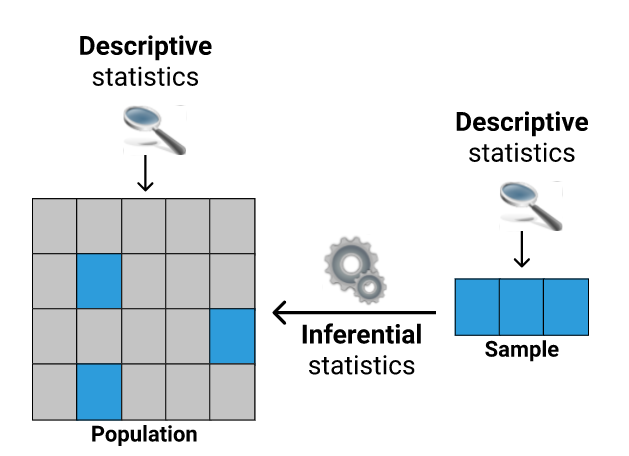